# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [203]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split data
from sklearn.model_selection import train_test_split

# To help with model building
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")


## Loading the Dataset

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
path='/content/drive/MyDrive/AAA-MIT/ELECTIVE_PROJECT/0_PRACTICAL_DATA_SCIENCE_KARINE/ExtraaLearn.csv'
df=pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [206]:
# Checking the shape of the dataset
df.shape

(4612, 15)

The dataset has 4,612 rows and 15 columns.

In [207]:
# Displaying the first and last rows of the dataset
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [208]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [209]:
# Checking for duplicated values
df.duplicated().sum()

0

There is no duplicated rows.

In [210]:
# Checking for missing values
round(df.isnull().sum() / df.isnull().count() * 100,2)

ID                      0.000
age                     0.000
current_occupation      0.000
first_interaction       0.000
profile_completed       0.000
website_visits          0.000
time_spent_on_website   0.000
page_views_per_visit    0.000
last_activity           0.000
print_media_type1       0.000
print_media_type2       0.000
digital_media           0.000
educational_channels    0.000
referral                0.000
status                  0.000
dtype: float64

There is no missing values in the dataset.

In [211]:
# Checking the data types and columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

*  From the 14 variables in the dataset, 10 are objects, 4 are integer, 1 is
float.
*  As seen previously, there is no null value.
*  The column ID is an identifier for lead in the data. It will not help with our analysis, we can drop it.

In [212]:
# Rechecking if we can drop the column ID.
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [213]:
# Dropping ID from the data
df.drop('ID', axis = 1, inplace=True)

In [214]:
# Checking if dropping the ID column worked well.
df.columns.tolist()

['age',
 'current_occupation',
 'first_interaction',
 'profile_completed',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral',
 'status']

In [215]:
# Checking the descriptive statistics of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.000,46.201,13.161,18.000,36.000,51.000,57.000,63.000
website_visits,4612.000,3.567,2.829,0.000,2.000,3.000,5.000,30.000
time_spent_on_website,4612.000,724.011,743.829,0.000,148.750,376.000,1336.750,2537.000
page_views_per_visit,4612.000,3.026,1.968,0.000,2.078,2.792,3.756,18.434
status,4612.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000


*   The average age of the lead is 46 years old with youngest at 18 and oldest at 63 years old.
*   The website is visited 3.5 times on average by leads with minimum of 0 and maximum of 30 visits. We will look closer at this data that seems highly skewed with median at 3 visits.
*   The time spent on website is 724 seconds with minimum of 0 and maximum time of 2537 sec. We will look closer at this data that seems highly skewed with median at 376 seconds.
*   The page view per visit is 3 on average and a maximum of 18 pages.
*  30% of leads transform to paid customers.



**For an easier understanding of the columns, we will rename print_media_type1 with neswpaper and print_media_type2 with magazine and review changes are made**

In [216]:
# Rename columns
df.rename(columns={'print_media_type1':'newspaper','print_media_type2':'magazine'}, inplace=True)
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,newspaper,magazine,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [217]:
# List of all the important categorical variables
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'newspaper', 'magazine', 'digital_media', 'educational_channels', 'referral' ]

In [218]:
# Printing the number of occurences of each unique value in each categorical column
for column in cat_col :
  print(df[column].value_counts(1))
  print('-' * 30)

Professional   0.567
Unemployed     0.312
Student        0.120
Name: current_occupation, dtype: float64
------------------------------
Website      0.551
Mobile App   0.449
Name: first_interaction, dtype: float64
------------------------------
High     0.491
Medium   0.486
Low      0.023
Name: profile_completed, dtype: float64
------------------------------
Email Activity     0.494
Phone Activity     0.268
Website Activity   0.239
Name: last_activity, dtype: float64
------------------------------
No    0.892
Yes   0.108
Name: newspaper, dtype: float64
------------------------------
No    0.949
Yes   0.051
Name: magazine, dtype: float64
------------------------------
No    0.886
Yes   0.114
Name: digital_media, dtype: float64
------------------------------
No    0.847
Yes   0.153
Name: educational_channels, dtype: float64
------------------------------
No    0.980
Yes   0.020
Name: referral, dtype: float64
------------------------------


**OBSERVATIONS ON DATA OVERVIEW :**

*   The current occupation of leads is Profesional (56%), Unemployed (31%) and Student (12%)
*   The first interraction of leads is through Website (55%) followed shortly by Mobile App (45%)
*   The percentage of profile completed is high, almost 100% between High (49%) and Medium (49%)
*   The last activity between the lead and EdTech was through mainly Email (49%), then Phone (27%) and Website (24%)
*   The lead has seen EdTech in Newspaper in 11% of cases
*   The lead has seen EdTech in Magazine in 5% of cases
*   The lead has seen EdTech in Digital Platform in 11% of cases
*   The lead has seen EdTech in Educational Channels in 15% of cases
*   The lead has heard of EdTech through referral in 2% of cases
*   30% of leads transformed to Paid Customers.


In [219]:
# Creating a copy of the dataframe
data = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**> UNIVARIATE ANALYSIS**

**We visualize the numerical values.**

In [220]:
# Function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(8, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {'height_ratios': (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = 'violet'
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = 'winter'
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = 'green', linestyle = '--'
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = 'black', linestyle = '-'
    )                   # Add median to the histogram

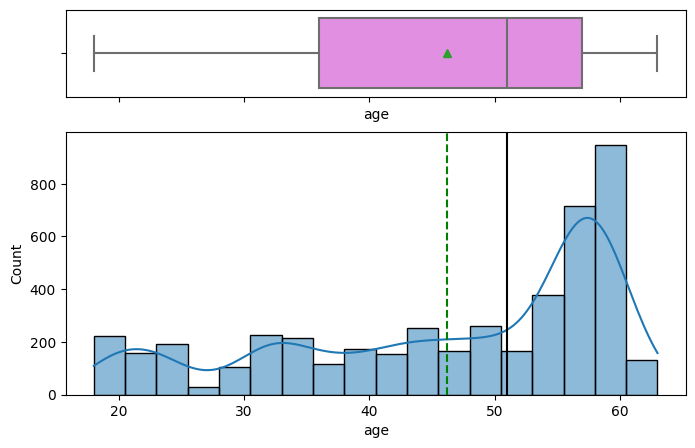

In [221]:
# Observations on Age
histogram_boxplot(data, 'age', kde = True)

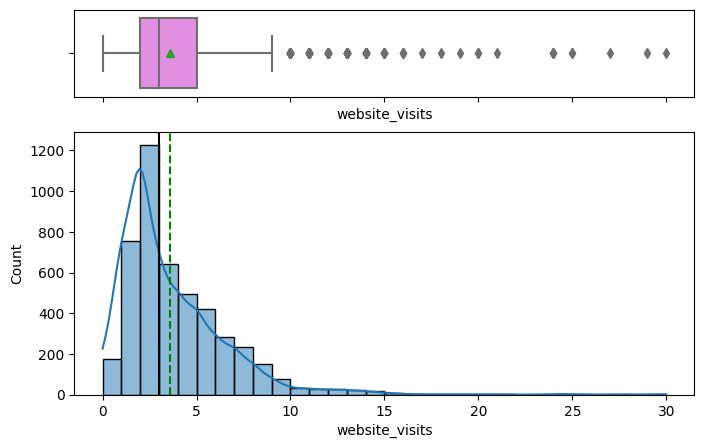

In [222]:
# Observations on Website Visits
histogram_boxplot(data, 'website_visits', kde = True, bins=30)

In [223]:
# Leads that have not visited the website
data[data["website_visits"] == 0].shape

(174, 14)

Out of 4612 leads, 174 of them have not visited the website.

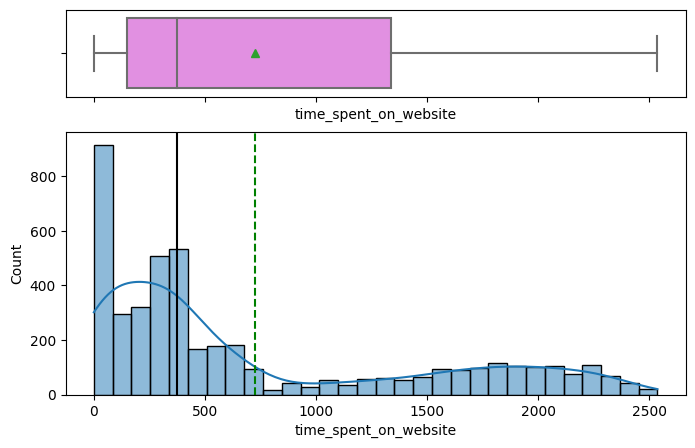

In [224]:
# Observations on Time Spent on Website
histogram_boxplot(data, 'time_spent_on_website', kde = True, bins=30)

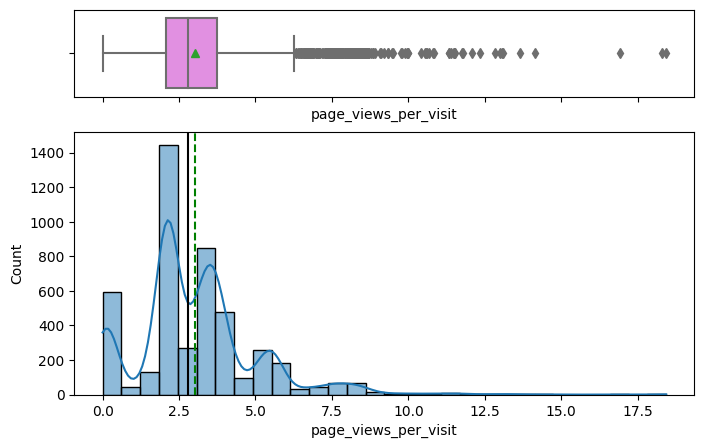

In [225]:
# Observations on Page Views per Visit
histogram_boxplot(data, 'page_views_per_visit', kde = True, bins=30)

**We visualize the categorical values we had seen previously.**


In [226]:
# Function to plot a barplot along the same scale
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (4, 3))
    plt.xticks(rotation=0)

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(
            percentage,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points",
        )                # Annotate the percentage

    plt.show()


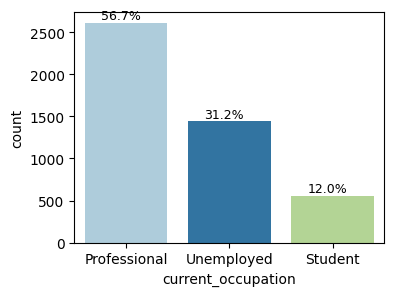

In [227]:
# Observations on Current Occupation
bar_perc(data, 'current_occupation')

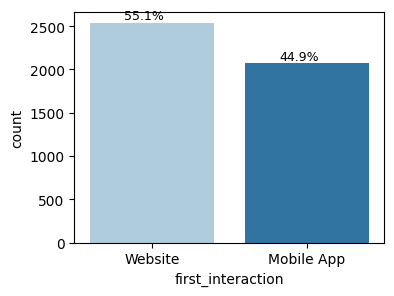

In [228]:
# Observations on First Interaction
bar_perc(data, 'first_interaction')

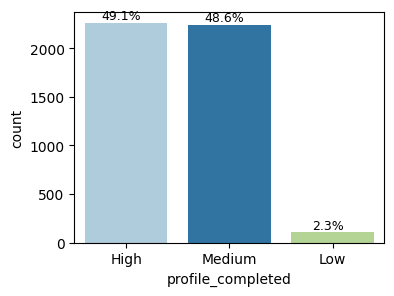

In [229]:
# Observations on Profile Completed
bar_perc(data, 'profile_completed')

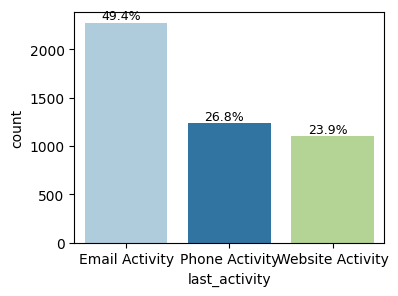

In [230]:
# Observations on Last Activity
bar_perc(data, 'last_activity')

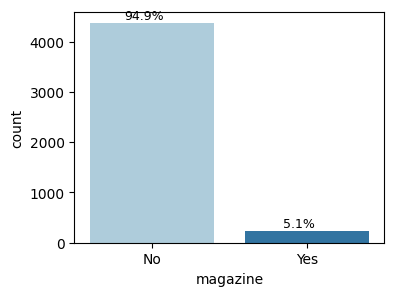

In [231]:
# Observations on Magazine
bar_perc(data, 'magazine')

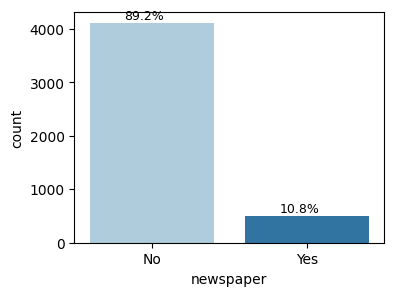

In [232]:
# Observations on Newspaper
bar_perc(data, 'newspaper')

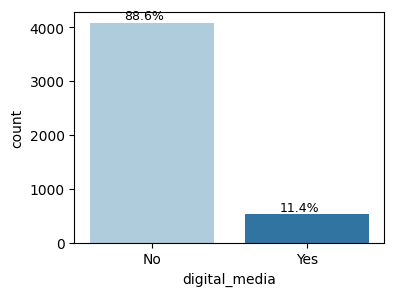

In [233]:
# Observations on Digital Media
bar_perc(data, 'digital_media')

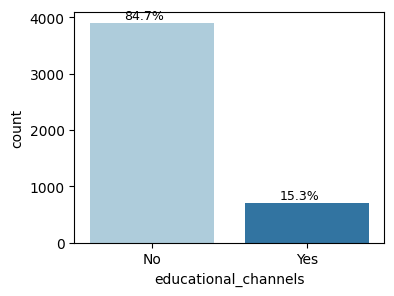

In [234]:
# Observations on Educational Channels
bar_perc(data, 'educational_channels')

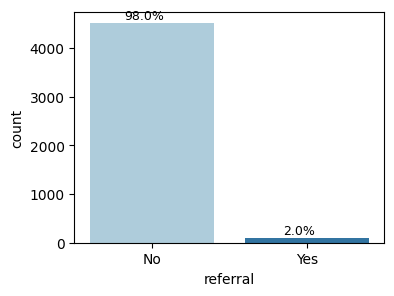

In [235]:
# Observations on Referral
bar_perc(data, 'referral')

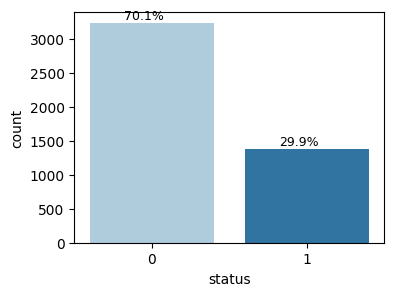

In [236]:
# Observations on Status
bar_perc(data, 'status')

**OBSERVATIONS ON UNIVARIATE ANALYSIS :**

* The distribution of age of leads is meanly left squewed. 50% of leads are 51 years old and below, while the peak distribution shows that most of the patients are around 60 years old.
* The distribution of website visits of leads is right squewed. 50% of visitors do 3 visits. We face lots of outliers. Out of 4612 leads, 174 of them have not visited the website.
* The distribution of the time spent on website is right squewed with 50% of time spent of 370 seconds (a little more than 6 mins.). Most of the visitors abandons the website within the first second. It would be interesting to further investigate why the website has such a high abandon rate on the 1st second.
* The distribution of page view per visit is right skewed with lots of outliers. We find the same tendance as in time spent where almost 600 visits see 0 pages due to abandonning website.

*   The current occupation of leads is Profesional (56%), Unemployed (31%) and Student (12%)
*   The first interraction of leads is through Website (55%) followed shortly by Mobile App (45%)
*   The percentage of profile completed is high, almost 100% between High (49%) and Medium (49%)
*   The last activity between the lead and EdTech was through mainly Email (49%), then Phone (27%) and Website (24%)
*   The lead has seen EdTech in Newspaper in 11% of cases
*   The lead has seen EdTech in Magazine in 5% of cases
*   The lead has seen EdTech in Digital Platform in 11% of cases
*   The lead has seen EdTech in Educational Channels in 15% of cases
*   The lead has heard of EdTech through referral in 2% of cases
*   30% of leads transformed to Paid Customers.

**> BIVARIATE ANALYSIS**

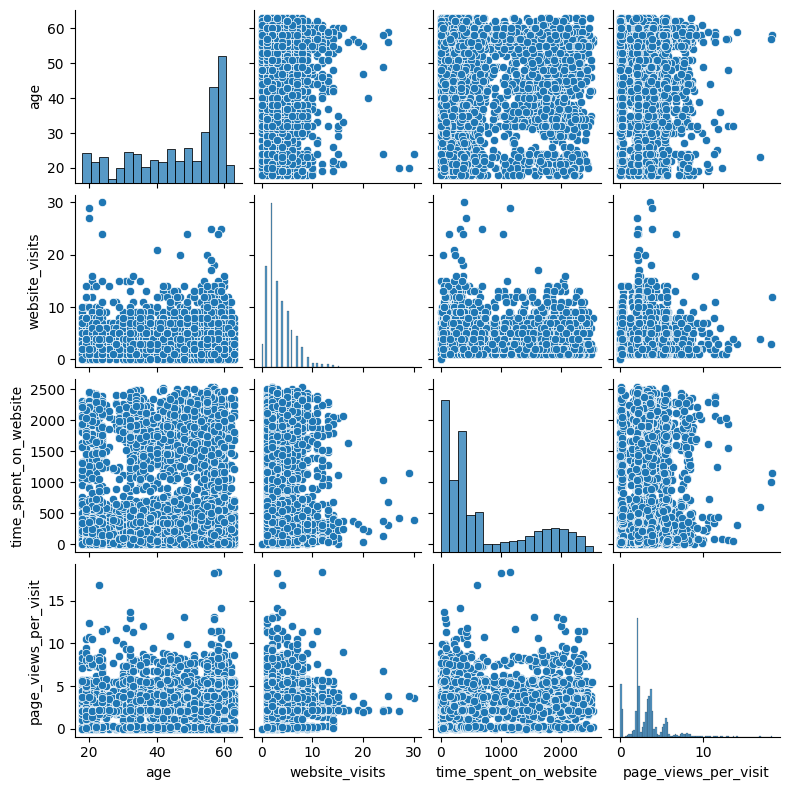

In [237]:
# Checking any correlation between variables.
sns.pairplot(data, size=2);

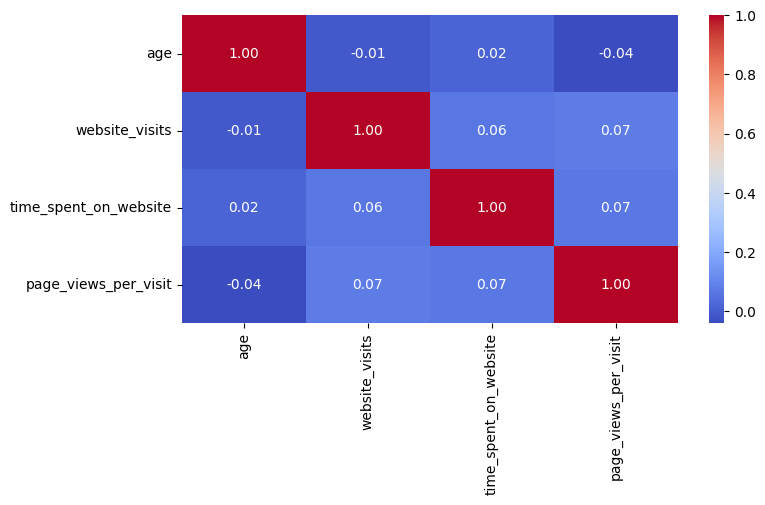

In [238]:
# Checking any correlation between variables.
plt.figure(figsize = (8, 4))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f', cmap = 'coolwarm');

There is no direct correlation between the numerical variables.

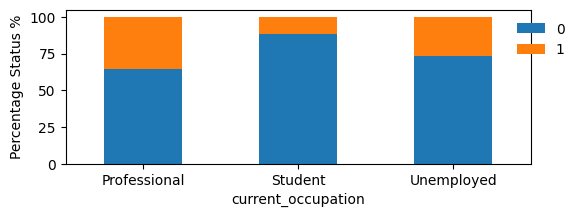

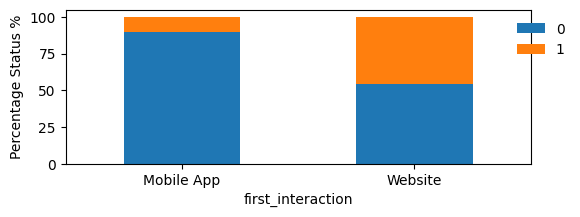

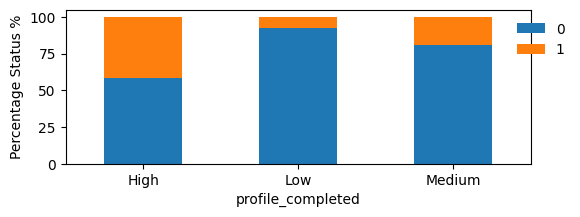

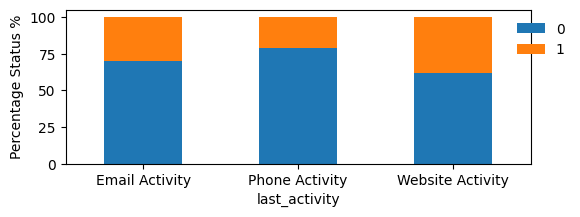

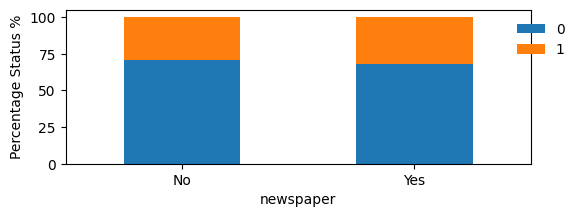

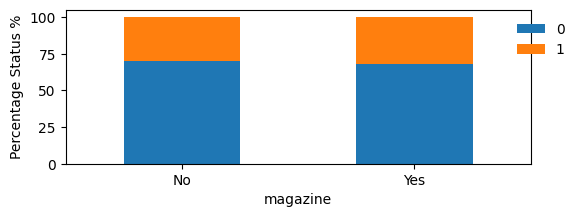

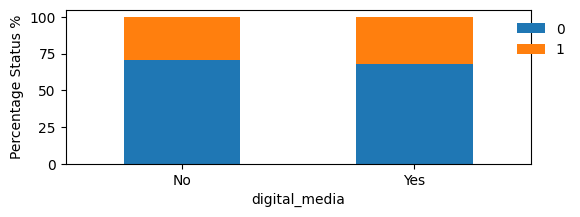

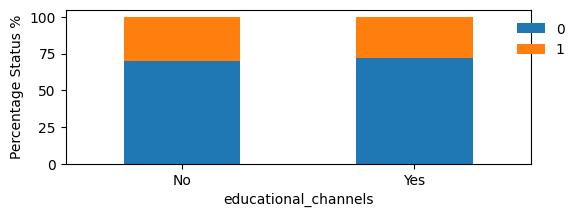

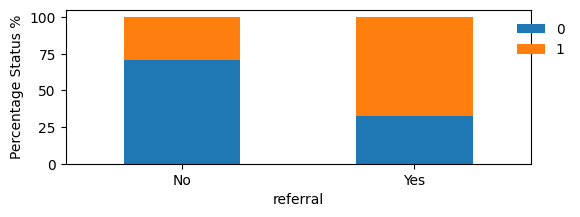

In [239]:
# Relation of variables towards the target variable Status.
for i in cat_col:
    if i != 'status':
        (pd.crosstab(data[i], data['status'], normalize = 'index')*100).plot(kind = 'bar', figsize = (6, 2), stacked = True)
        plt.ylabel('Percentage Status %')
        plt.xticks(rotation=0)
        plt.legend(loc="upper right", frameon=False, bbox_to_anchor=(1.1, 1))


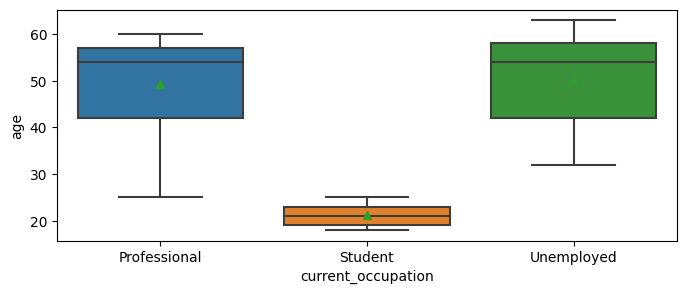

In [240]:
# Influence of Age on Current Occupation for Lead Conversion.
plt.figure(figsize=(8, 3))
sns.boxplot(data = data, x = 'current_occupation', y = 'age', showmeans = True,)
plt.show()

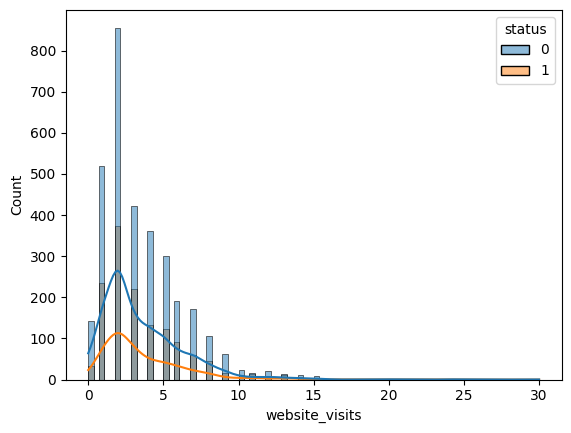

In [241]:
# Website information vs. Status.
sns.histplot(data = data, x = 'website_visits', hue='status', kde=True);

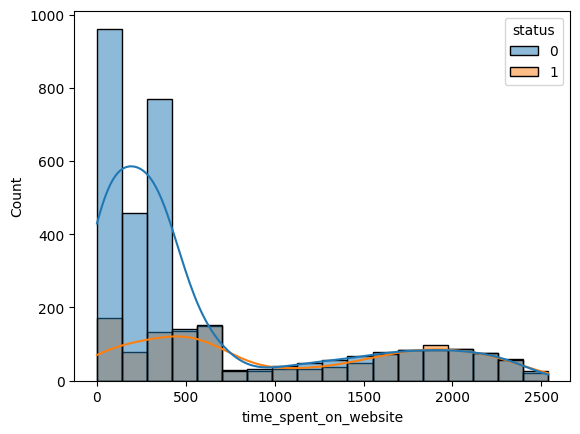

In [242]:
# Time Spent on Website vs. Status.
sns.histplot(data = data, x = 'time_spent_on_website', hue='status', kde=True);

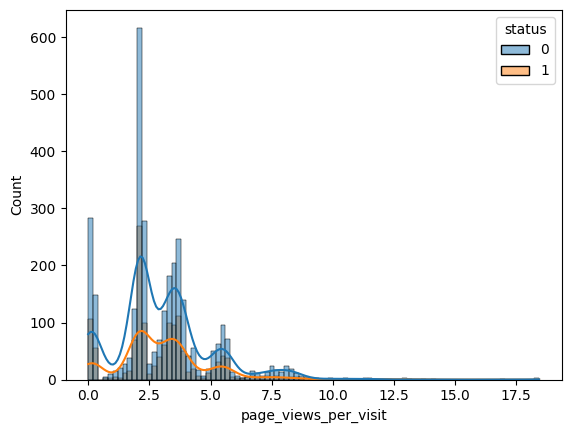

In [243]:
# Page View per Visit vs. Status.
sns.histplot(data = data, x = 'page_views_per_visit', hue='status', kde=True);

**OBSERVATIONS ON BIVARIATE ANALYSIS :**

* The converted paid customer is more likely to be Professional or Unemployed rather than Student.
* His age reference is important to take into account, around 50 years old.
* He first interacted on the Website rater than Mobile App.
* He has mainly a High or Medium completed profile compared to Low, which makes sense because they mainly visit the Website and Mobile App where lead is asked to complete profile.
* His last activity interaction with EdTech was through Website Activity closely followed by Email and Phone.
* The converted paid customer has similar seen the EdTech ad on Newspaper, Magazine, Digital Media and Education Channels. This did not seem to be a changing factor on becoming a Paid Customer.
* But in Referral, there is a high proportion of converted into Paid Customer.
* Surprisingly, the converted Paid Customer spends less Website visits, Time Spent on Website and Pages Views per Visit compared to the lead that does not convert.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Outliers detection and treatment**

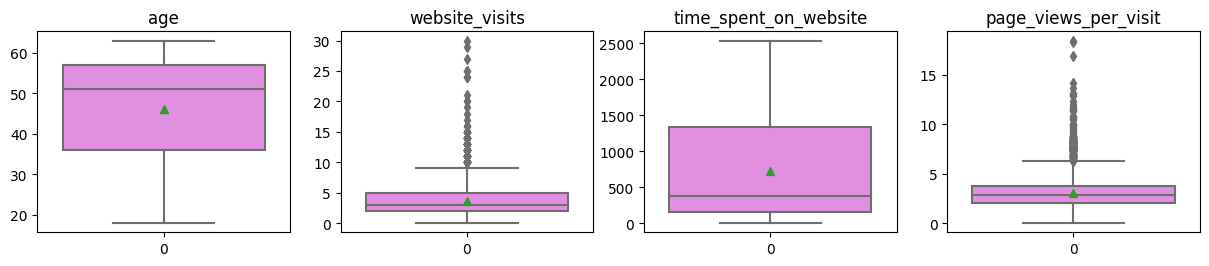

In [244]:
# Checking outliers in the data
num_col = ['age','website_visits','time_spent_on_website','page_views_per_visit']

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5, showmeans = True, color = 'violet')
    plt.title(variable)

plt.show()

As seen previously, we have outliers in Website Visits and Page Views per Visit that do not interfer with our analysis. We will leave them as they are.

**Creating dummy variables for categorical Variables**

In [245]:
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['current_occupation','first_interaction','profile_completed','last_activity']

In [246]:
# Creating dummy variables
data = pd.get_dummies(data = data, columns = to_get_dummies_for, drop_first = True)

**Mapping variables to convert from Yes/No to 1 or 0.**

In [247]:
# Mapping variables to convert Yes and No to 1 and 0
dict_newspaper = {'Yes': 1, 'No': 0}
dict_magazine = {'Yes': 1, 'No': 0}
dict_digital_media = {'Yes': 1, 'No': 0}
dict_educational_channels = {'Yes': 1, 'No': 0}
dict_referral = {'Yes': 1, 'No': 0}

data['newspaper'] = df.newspaper.map(dict_newspaper)
data['magazine'] = df.magazine.map(dict_magazine)
data['digital_media'] = df.digital_media.map(dict_digital_media)
data['educational_channels'] = df.educational_channels.map(dict_educational_channels)
data['referral'] = df.referral.map(dict_referral)

**Separating the independent variables (X) and the dependent variable (Y)**


In [248]:
# Separating the target variable and other variables
Y = data.status
X = data.drop(columns = ['status'])

**Splitting the data into 70% train and 30% test sets**

In [249]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [250]:
# Checking shape of the train and test data
X_train.shape

(3228, 16)

In [251]:
X_test.shape

(1384, 16)

Our dataset is now ready for modeling.

## Building a Decision Tree model

The model can make two types of wrong predictions:

* Predicting a lead will convert to paid client, but in reality, the lead doesn't become a paid client.
* Predicting a lead will not convert to paid client, but in reality the lead converts into a  paid client.

Which case is more important ?

* If we predict that a lead will convert to paid client, but in reality, the lead doesn't become a paid client ; then EdTech tel will lose resources and time and will have to bear additional costs to convert the lead.
* If we predict a lead will not convert to paid client, but in reality the lead converts into a  paid client ; then EdTech might not be able to provide satisfactory services to the customer by assuming that this lead will not convert. This damages EdTech.

How to reduce this loss i.e the need to reduce False Negatives?

The company would want the Recall to be maximized, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives very well, so that the company can provide incentives to control the attrition rate especially, for top-performers. This would help in optimizing the overall project cost towards retaining the best talent.


**Create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [252]:
# Function to print classification report and get confusion matrix
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [253]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred)                 # To compute recall

    precision = precision_score(target, pred)              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [1],
    )

    return df_perf

**Building Decision Tree**

* If the frequency of class 0 is 70% and the frequency of class 1 is 30%, then class 0 will become the dominant class and the decision tree will become biased toward the frequency class.
* class_weight is a hyperparameter for the decision tree classifier, and in this case, we can pass a dictionary {0:0.30, 1:0.70} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [254]:
#Verifying the ratio of each class
data.status.value_counts(normalize=True)

0   0.701
1   0.299
Name: status, dtype: float64

In [255]:
# Building the decision tree model
dt =  DecisionTreeClassifier(class_weight = {0:0.30, 1:0.70}, random_state = 7)

In [256]:
# Fitting the decision tree classifier on the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=7)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



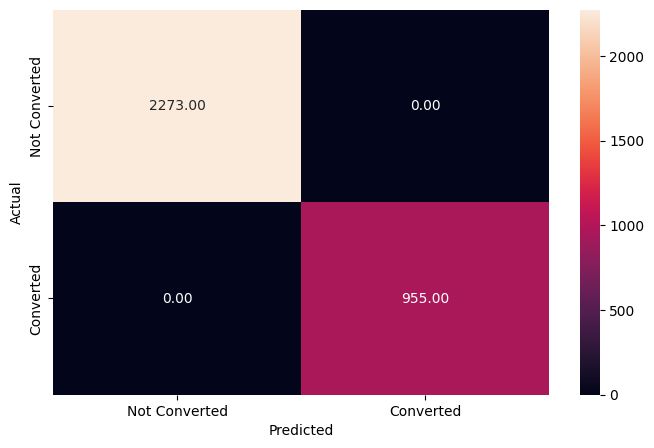

In [257]:
# Checking performance on the training data
y_pred_train_dt = dt.predict(X_train)

metrics_score(y_train, y_pred_train_dt)


**Observation:**

* The Decision tree is giving a 100% score for all metrics on the training dataset. The model has performed ver well on the training set.
* As we know, a decision tree will continue to grow and classify each data point correctly if no restrictions are applied, as the trees will learn all the patterns in the training set. So, it can easily overfit the training data.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       962
           1       0.68      0.68      0.68       422

    accuracy                           0.80      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.80      0.80      0.80      1384



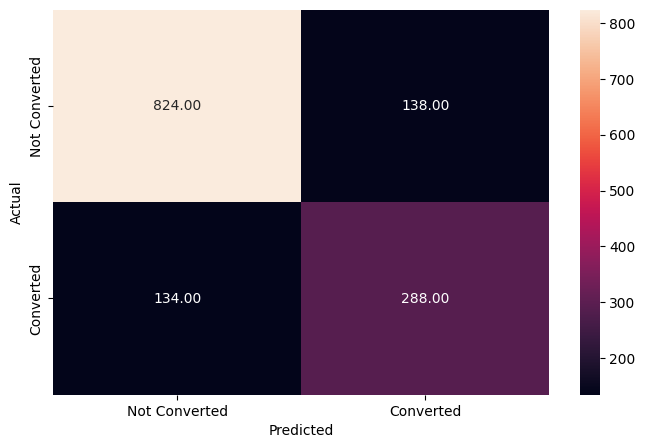

In [258]:
# Checking performance on the testing data
y_pred_test_dt = dt.predict(X_test)

metrics_score(y_test, y_pred_test_dt)

In [259]:
# Summary of model performance on test data
dtree_test = model_performance_classification(dt,X_test,y_test)
dtree_test

,Precision,Recall,Accuracy
1,0.676,0.682,0.803


* The Decision Tree works well on the training data but not so well on the test data as the recall is 0.68 in comparison to 1 for the training dataset.
* The decision tree model is overfitting the training data as expected and is not able to generalize well on the test set.

Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth to reduce overfitting of the model. We can tune some other hyperparameters as well.

**DECISION TREE HYPERPARAMETER TUNING**

Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
It is an exhaustive search that is performed on the specific parameter values of a model.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Criterion{“gini”, “entropy”}**
The function is to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [260]:
# Choose the type of classifier
dt_estimator = DecisionTreeClassifier(class_weight = {0:0.30, 1:0.70}, random_state = 7)

In [261]:
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dt_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dt_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dt_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data.
Now let´s check model performance on the training and testing data.

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



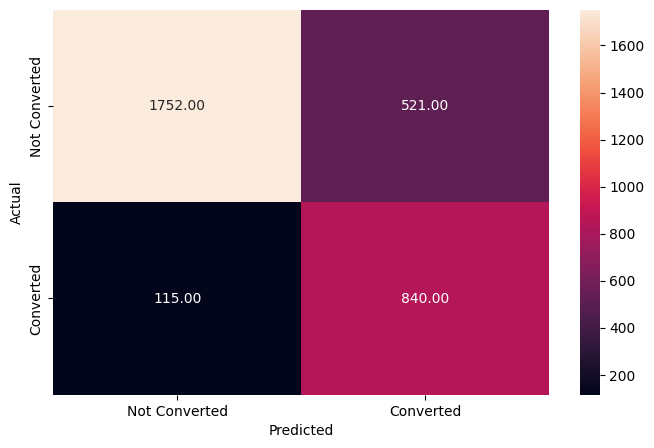

In [262]:
# Checking performance on the training dataset
y_pred_train_dt_tuned = dt_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_dt_tuned)

Observations
* In comparison to the model with default values of hyperparameters, the performance on the training set has gone down significantly.
* We can see that the performance on the training data has decreased which can be expected as we are trying not to overfit the training dataset.

Now let´s check performance on the test data.

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



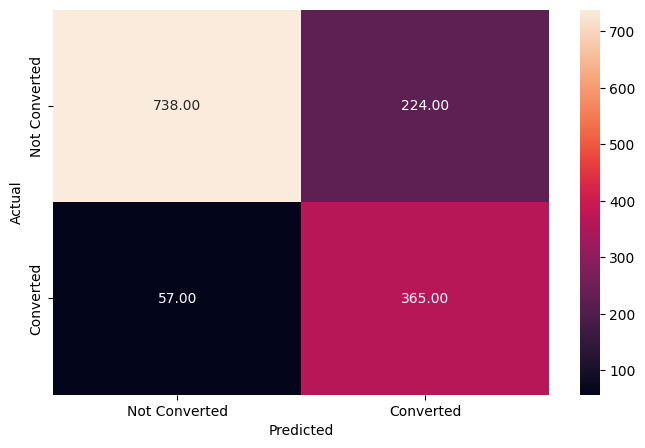

In [263]:
# Checking performance on the test dataset
y_test_pred_dt_tuned = dt_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt_tuned)

In [264]:
# Summary of model performance on test data
dtree_tuned_test = model_performance_classification(dt_estimator,X_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
1,0.620,0.865,0.797


Observations:

* We can observe that the recall for class 1 has decreased and the precision stayed the same.  
* The overfitting has reduced significantly and now the model is performing more generalized on both training and testing data.


**Decision Tree Visualization**

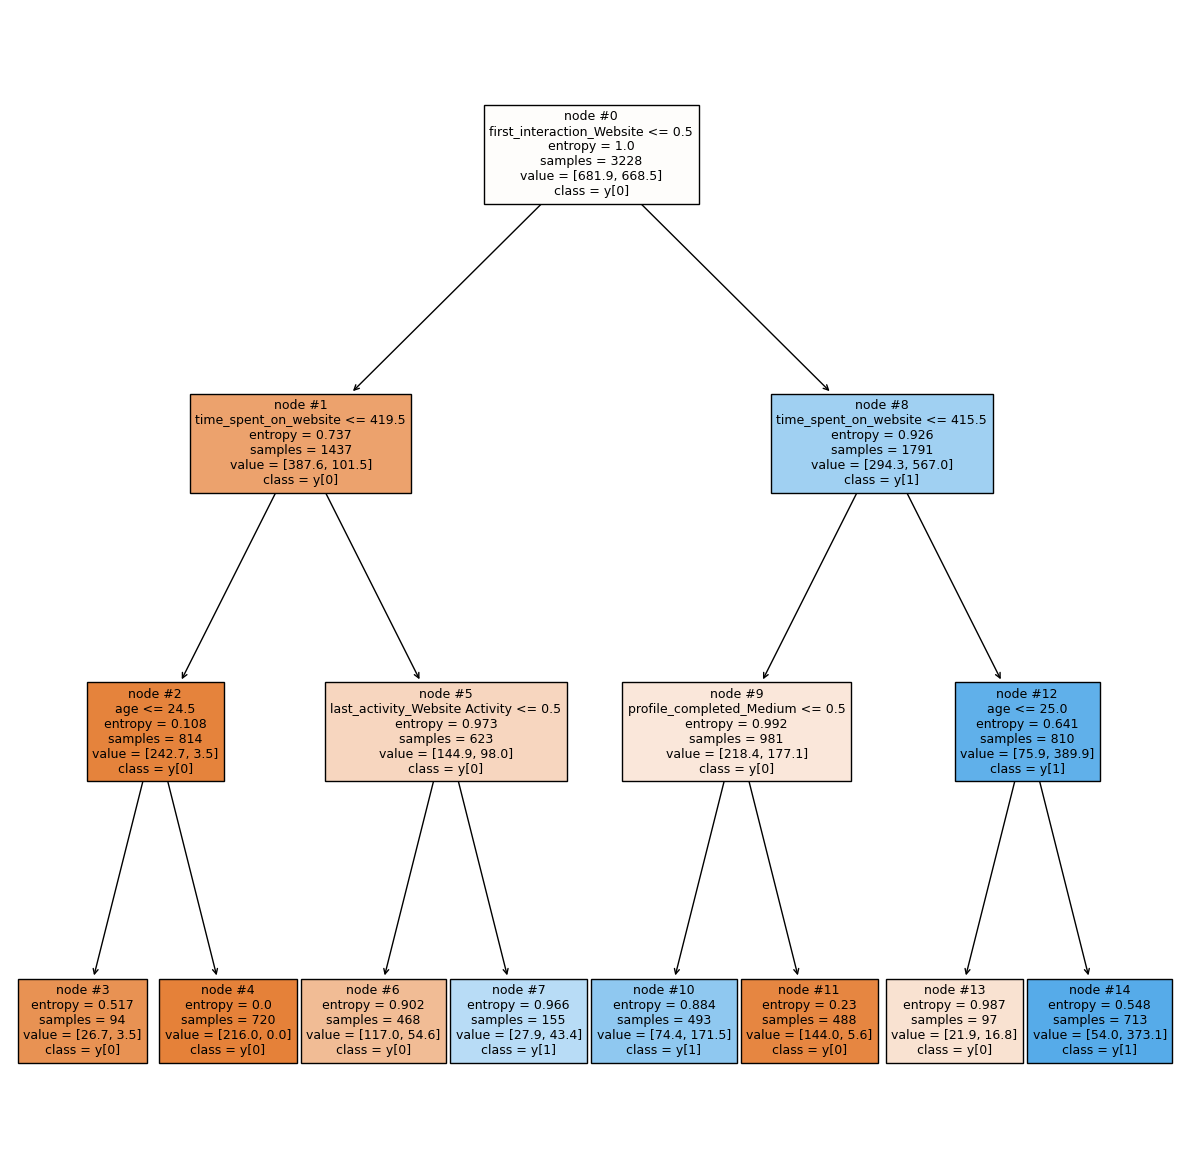

In [265]:
# Plot the Decision Tree
features = list(X.columns)

plt.figure(figsize = (15, 15))

tree.plot_tree(dt_estimator, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [266]:
# See a printed representation of the Decision Tree
print(tree.export_text(dt_estimator, feature_names=X_train.columns.tolist(), show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 24.50
|   |   |   |--- weights: [26.70, 3.50] class: 0
|   |   |--- age >  24.50
|   |   |   |--- weights: [216.00, 0.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [117.00, 54.60] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [27.90, 43.40] class: 1
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 415.50
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- weights: [74.40, 171.50] class: 1
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [144.00, 5.60] class: 0
|   |--- time_spent_on_website >  415.50
|   |   |--- age <= 25.00
|   |   |   |--- weights: [21.90, 16.80] class: 0
|   |   |--- age >  25.00
|   |   |   |--- weights: [54.00, 373.10] class: 1



Note: Blue leaves represent the leads that are converted in paid customer, i.e., y[1], while the light orange leaves represent the lead that do not convert into paid customers, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets.

**OBSERVATIONS ON DECISION TREE**

**Root Node:** first_interaction_Website <= -0.5. This is the starting point of the decision tree, which means that the first interacting through website results in the highest information gain among all the features. If the value is less than or equal to 0.5, the left branch is taken, and if it is greater than 0.5, the right branch is taken.

**Internal Node:** These are the intermediate nodes of the tree. Each node represents a decision based on a particular feature and a threshold value. Depending on the value of the feature, the tree follows the appropriate branch until it reaches a leaf node :  time_spent_on_website, age, last_activity_Website, profile_completed_Medium.

**Leaf nodes** are the nodes in the tree that do not have any child nodes. In this tree, the leaf nodes correspond to the final decision of the tree.


Interpretation of the Decision Tree :  
* The first split in the decision tree is at first interaction Website which implies that it is one of the most important factors in deciding whether the lead will convert or not.
* As per decision rules, lead whose first interaction Website are more likely to convert. If we follow the tree, this lead would have better chance to convert if he spends more than 415.5 seconds (around 7 mins) on the website and his age is more than 25 years old.
* A second profile of conversion would be the same way with lead whose first interaction Website, spends less than 415.5 seconds (around 7 mins) on the website and has not a profile completed (Medium).
* A third profile of conversion but less likely to convert than the previous two ones is a lead whose 1st interaction is not the website, does spend more than 419 seconds on the website (around 7 mins), whose last activity is on the Website.


**Let's look at the feature importance of this model and try to analyze why this is happening.**

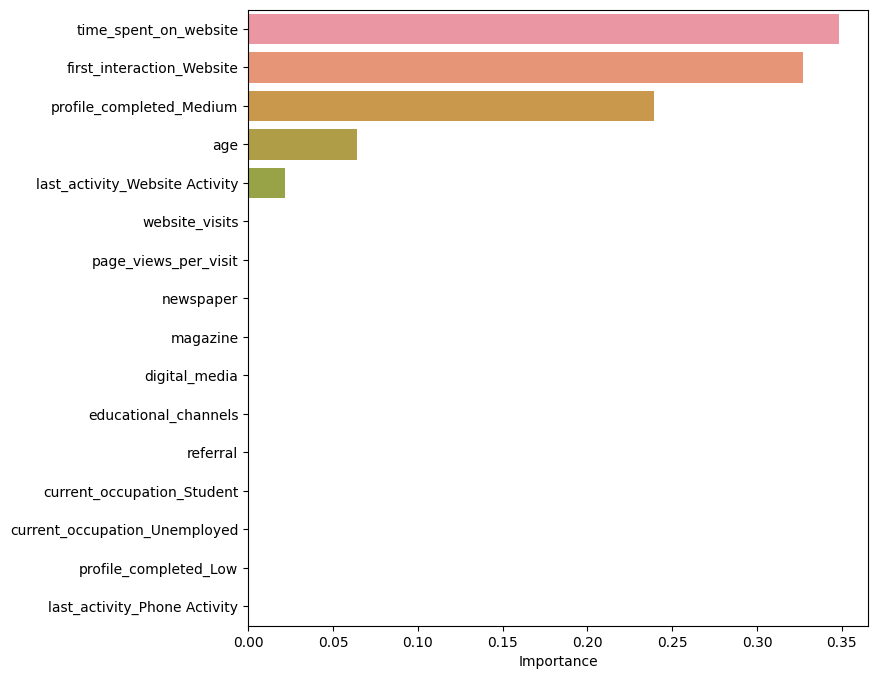

In [267]:
# Feature importance of the Decision Tree visualization
importances = dt_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**OBSERVATIONS**

After tuning the model we are getting that only 3 features are important: Time Spent on Website, Fist Interaction Website and Profile Completed Medium to decide whether a lead will be converted or not.

Let´s build another model : Random Forest model

## Building a Random Forest model

In [268]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 7, criterion = "entropy")

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       random_state=7)

## Model Performance evaluation and improvement

**Checking performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



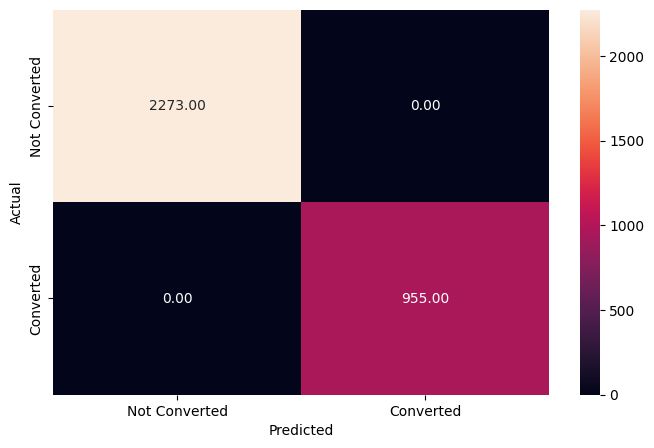

In [269]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

* Similar to the decision tree, the random forest model is giving  a perfect performance on the training data.
* The model is most likely overfitting to the training dataset as we observed for the decision tree.

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.81      0.68      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



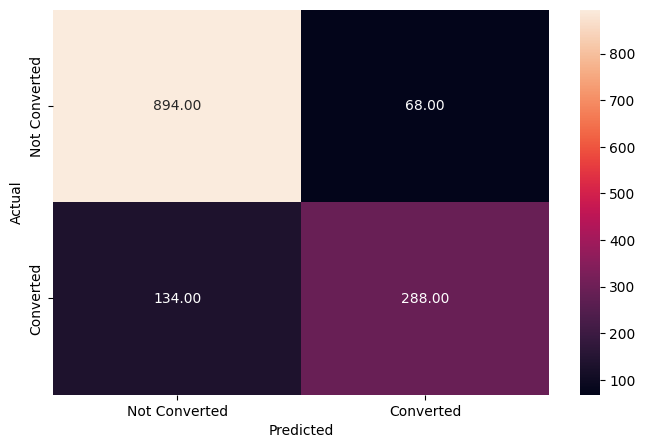

In [270]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [271]:
# Summary of model performance on test data
rf_estimator_test = model_performance_classification(rf_estimator,X_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
1,0.809,0.682,0.854


* The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.68 for class 1.




Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth to reduce overfitting of the model. We can tune some other hyperparameters as well.

**RANDOM FOREST HYPERPARAMETER TUNING**

In [272]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [80, 90, 110, 140],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base = grid_obj.best_estimator_

In [273]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_features=0.8, n_estimators=140,
                       random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.69      0.87      0.77       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.83      3228
weighted avg       0.86      0.84      0.85      3228



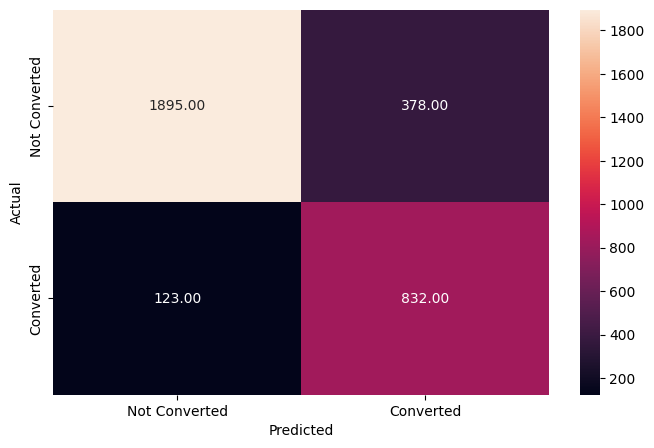

In [274]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned_base.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       962
           1       0.70      0.85      0.77       422

    accuracy                           0.84      1384
   macro avg       0.81      0.85      0.82      1384
weighted avg       0.86      0.84      0.85      1384



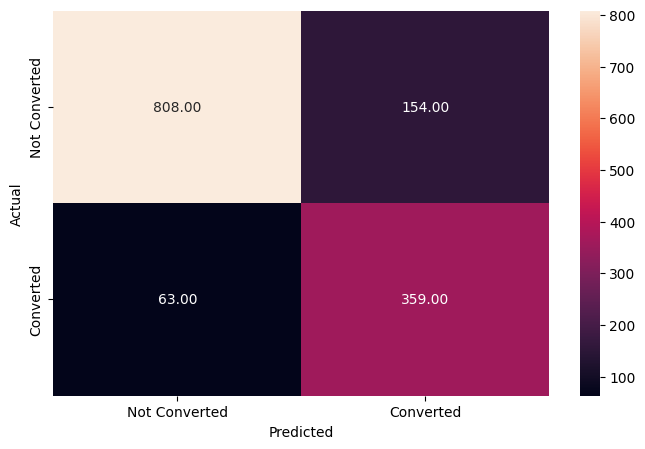

In [275]:
# Checking performance on the testing data
y_pred_test_rf_tuned = rf_estimator_tuned_base.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [276]:
# Summary of model performance on test data
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned_base, X_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
1,0.700,0.851,0.843


* We can see that after tuning the Random Forest hyperparameters, the recall increased to 0.85 and the accuracy remains the same as for the training dataset.


**We will try to tune the model newly to see if we reach better results.**

**RANDOM FOREST HYPERPARAMETER TUNING #2**

In [277]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [70, 80, 90, 110, 140],
    "max_depth": [3, 5, 6],
    "max_features": [0.8, 0.9, 1],
    "min_samples_leaf": [20, 25],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned_base2 = grid_obj.best_estimator_

In [278]:
# Fitting the best algorithm to the training data
rf_estimator_tuned_base2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=0.9, min_samples_leaf=20,
                       n_estimators=70, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2273
           1       0.59      0.90      0.72       955

    accuracy                           0.79      3228
   macro avg       0.77      0.82      0.77      3228
weighted avg       0.84      0.79      0.80      3228



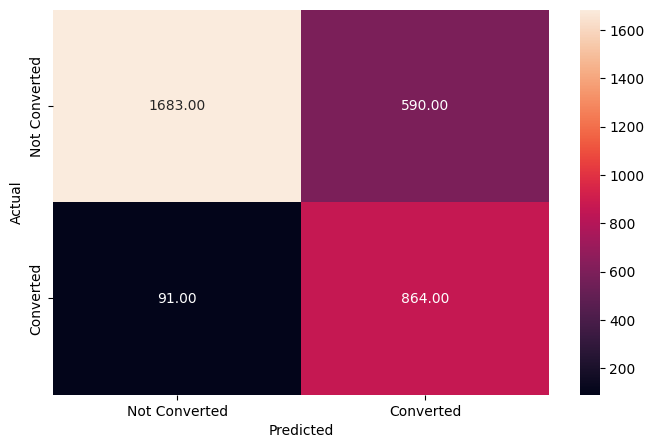

In [279]:
# Checking performance on the training data
y_pred_train_rf_tuned2 = rf_estimator_tuned_base2.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned2)

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       962
           1       0.61      0.89      0.72       422

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.84      0.79      0.80      1384



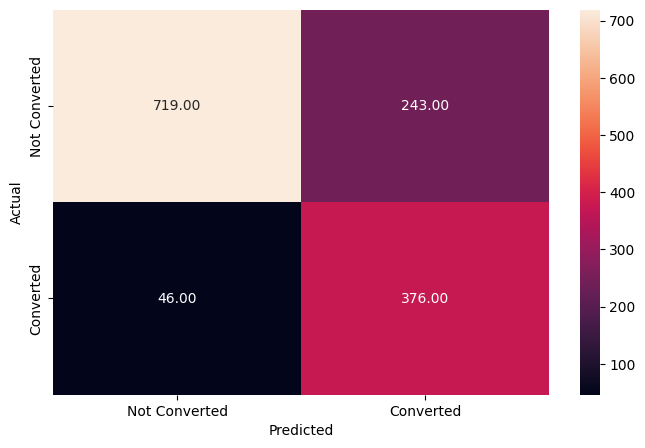

In [280]:
# Checking performance on the testing data
y_pred_test_rf_tuned2 = rf_estimator_tuned_base2.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned2)

In [281]:
# Summary of model performance on test data
rf_estimator_tuned_test2 = model_performance_classification(rf_estimator_tuned_base2, X_test, y_test)
rf_estimator_tuned_test2

,Precision,Recall,Accuracy
1,0.607,0.891,0.791


* This model gives us the best recall performance so far with 89.1.

**We will try a last Boosting Method : XGBoost**

**RANDOM FOREST BOOSTING METHOD : XGBOOST**

In [282]:
# XGBoost Regressor
xgb = XGBClassifier(random_state = 1)

# Fitting the model
xgb.fit(X_train,y_train)

# Summary of model performance on test data
xgb_perf_test = model_performance_classification(xgb, X_test, y_test)

xgb_perf_test

,Precision,Recall,Accuracy
1,0.761,0.718,0.845


This model does not give us a better recall rate compared to the tuned random forest model #2.

**Let's look at the feature importance of the Tuned Random Forest model #2 and try to analyze why this is happening.**

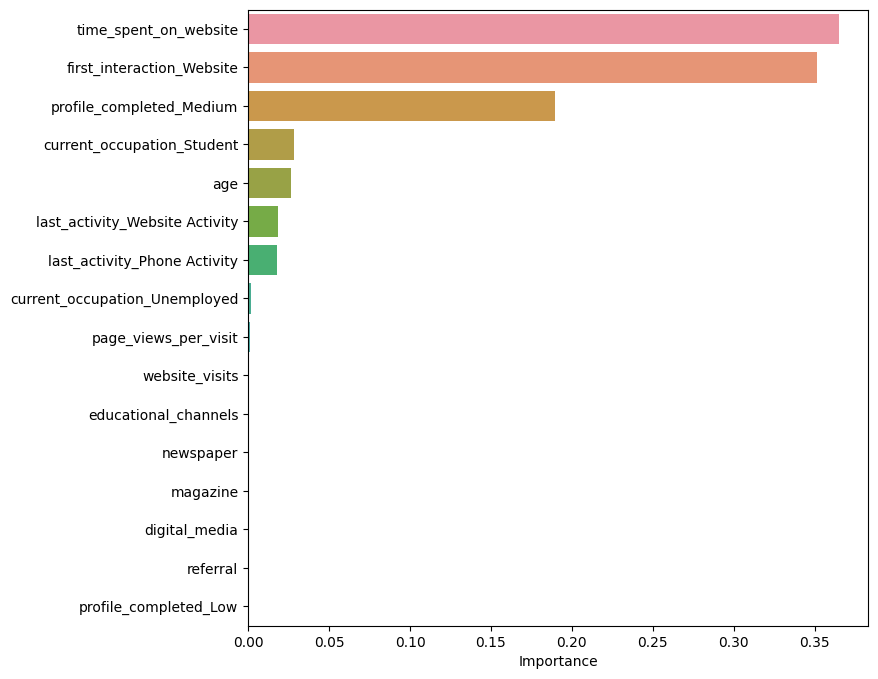

In [283]:
# Visualize feature importance of the model Tuned Random Forest #2
importances = rf_estimator_tuned_base2.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x=importance_df.Importance, y=importance_df.index);

**OBSERVATION**

* The feature importance plot for the base model and tuned model are quite similar. The model seems to suggest that Time Spent on Website, First Interaction Website and Profile Completed Medium
* Other important features is Age to decide whether a lead will be converted or not.

**MODEL BUILDING SUMMARY**

In [284]:
# Summary of the implemented model on test data
models_test_comp_df = pd.concat(

    [
    dtree_test.T, dtree_tuned_test.T, rf_estimator_test.T, rf_estimator_tuned_test.T, rf_estimator_tuned_test2.T, xgb_perf_test.T
    ],

    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Tuned Random Forest classifier2",
    "XGBoost classifier"
]

In [285]:
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,Tuned Random Forest classifier2,XGBoost classifier
Precision,0.676,0.620,0.809,0.700,0.607,0.761
Recall,0.682,0.865,0.682,0.851,0.891,0.718
Accuracy,0.803,0.797,0.854,0.843,0.791,0.845


**OBSERVATION**

The Tuned Random Forest classifier #2 gives the best results of all model creation.


## Actionable Insights and Recommendations

**CONCLUSIONS**

* The best model we have got so far is the tuned random forest model #2 which is giving 89.1 recall for class 1 on the test data. Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made. And an accuracy of 79.1
* The company should use this model to know beforehand which lead is going to comvert to plan its actions and ressources accordingly.
* Time Spent on Website, First Interaction Website and Profile Completed Medium seem to be the most important features to be taken into account.

**RECOMMENDATIONS**

* We saw that Time Spent on Website is the most important driver of lead conversion. The company should paid an extra attention to its website to make sure that it fills its clients´needs as this is the main revenue driver. It would be important to look deeper into the main performances of the website both internally or through the advices of a professional web and digital marketing agency to improve website performances and therefore increase conversion rate.

* Also we saw that most of the visitors leave the website within the first second. It would be interesting to further investigate why the website has such a high abandon rate and try to lower it since it is EdTech first source of lead conversion.

* Since First Interaction Website and Profile Completed Medium are the second and third most important drivers to convert leads, it would be recommended to explore alternatives to improve this interaction. A/B testing would be a great option whereas to know if EdTech can improve this interaction to convert more leads into paid customers.

* We have seen that the publicity supports where the lead has seen EdTech do not play much a role into the lead conversion. The only channel that converts widely is Referall. This could be an opportunity to re-alocate marketing budget and efforts more effectively and build new referal opportunity campaigns to increase lead conversion. These re-allocated marketing budget could be spent wiser to improve website performances and therefore have a better ROI from the website.

>> With all these conclusions and recommendations, EdTech will be able to improve its actual pourcentage of leads conversion to Paid Customers.

